In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
file_path = "placementdata.csv"  
df = pd.read_csv(file_path)
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [16]:
summary_stats = df.describe()
category_counts = df[['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']].apply(pd.Series.value_counts)
print("Summary Statistics:")
print(summary_stats)
print("\nCategory Counts:")
print(category_counts)

Summary Statistics:
         StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73

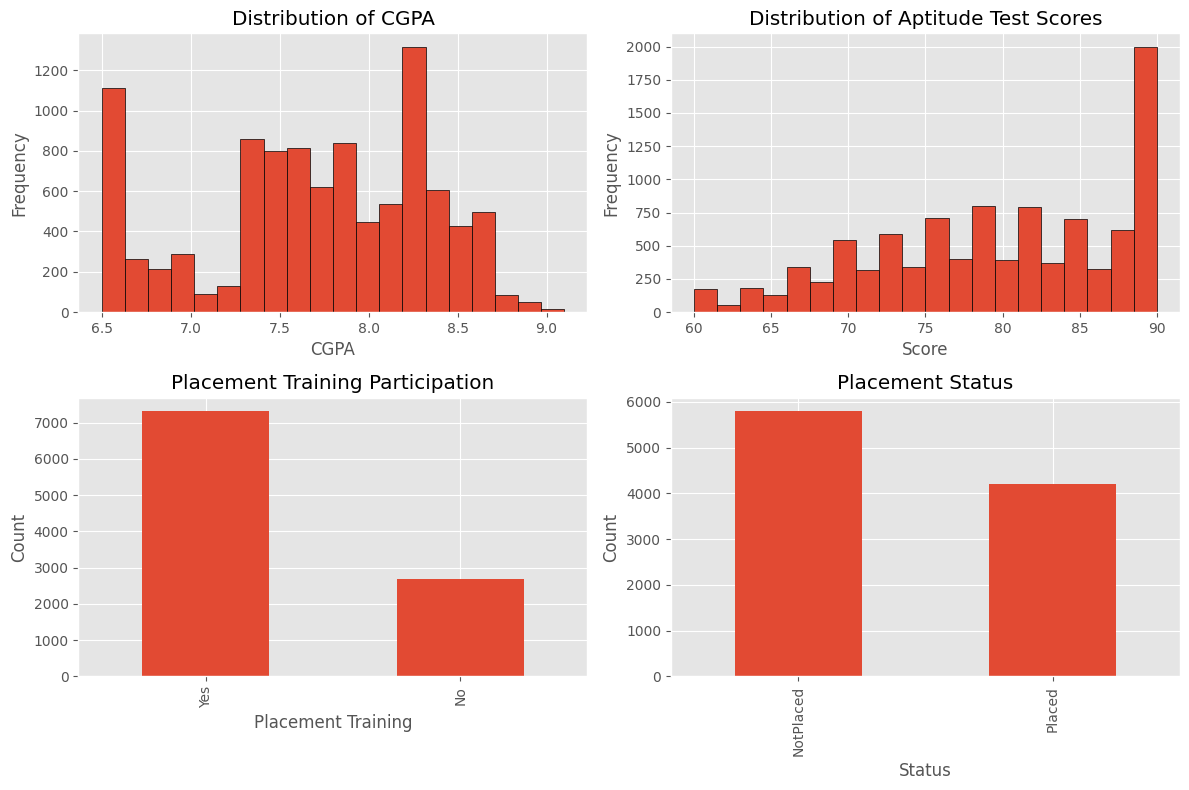

In [17]:
#Univariate Analysis

plt.style.use("ggplot")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['CGPA'], bins=20, edgecolor='k')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['AptitudeTestScore'], bins=20, edgecolor='k')
plt.title('Distribution of Aptitude Test Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
df['PlacementTraining'].value_counts().plot(kind='bar')
plt.title('Placement Training Participation')
plt.xlabel('Placement Training')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df['PlacementStatus'].value_counts().plot(kind='bar')
plt.title('Placement Status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


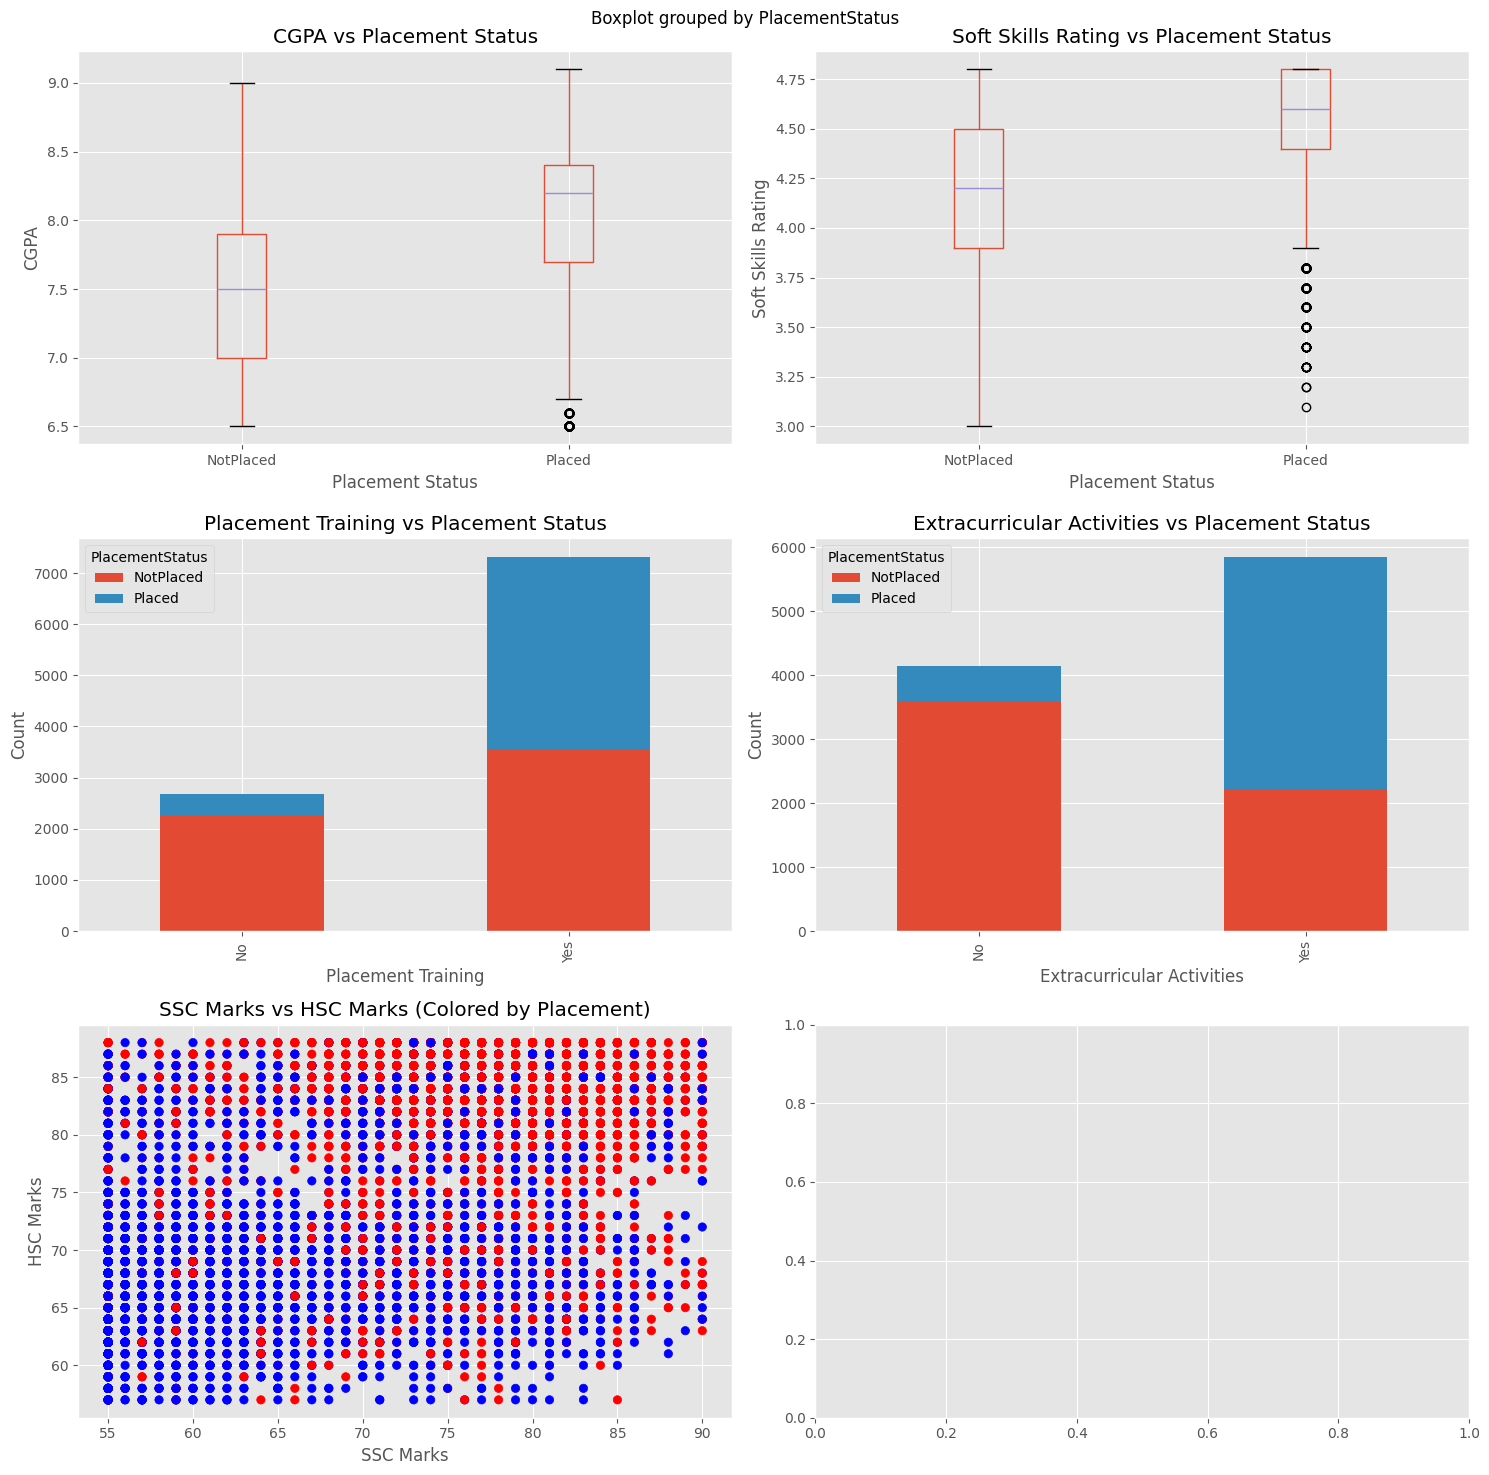

In [18]:
#Bivariate Analysis

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

df.boxplot(column='CGPA', by='PlacementStatus', ax=axes[0, 0])
axes[0, 0].set_title("CGPA vs Placement Status")
axes[0, 0].set_xlabel('Placement Status')
axes[0, 0].set_ylabel('CGPA')

df.boxplot(column='SoftSkillsRating', by='PlacementStatus', ax=axes[0, 1])
axes[0, 1].set_title("Soft Skills Rating vs Placement Status")
axes[0, 1].set_xlabel('Placement Status')
axes[0, 1].set_ylabel('Soft Skills Rating')

df.groupby(['PlacementTraining', 'PlacementStatus']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title("Placement Training vs Placement Status")
axes[1, 0].set_xlabel('Placement Training')
axes[1, 0].set_ylabel('Count')

df.groupby(['ExtracurricularActivities', 'PlacementStatus']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title("Extracurricular Activities vs Placement Status")
axes[1, 1].set_xlabel('Extracurricular Activities')
axes[1, 1].set_ylabel('Count')

axes[2, 0].scatter(df['SSC_Marks'], df['HSC_Marks'], c=df['PlacementStatus'].apply(lambda x: 1 if x == 'Placed' else 0), cmap='bwr')
axes[2, 0].set_title("SSC Marks vs HSC Marks (Colored by Placement)")
axes[2, 0].set_xlabel('SSC Marks')
axes[2, 0].set_ylabel('HSC Marks')

plt.tight_layout()
plt.show()